In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
sns.set()
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [155]:
def diagnostic_plot(X, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(X,y)
    pred = rgr.predict(X)
    
    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

# Feature Selection Process

Starting modeling with all features, regardless of correlation. 

In [257]:
df = pd.read_csv('data/nicedf.csv')

In [258]:
df.year_released = 2021-df.year_released

In [259]:
df.rename(columns={'year_released':'age'},inplace=True)

In [260]:
df.drop(columns=['ratio'],inplace=True)

In [261]:
df.owners = np.log(df.owners)

In [225]:
df.columns[:22]

Index(['title', 'owners', 'num_reviews', 'positive', 'negative', 'pos_percent',
       'neg_percent', 'ccu', 'median_2weeks', 'median_forever',
       'average_2weeks', 'average_forever', 'been_sale', 'orig_price',
       'num_tags', 'num_genres', 'age', 'rating_val', 'num_followers',
       'num_languages', 'has_meta', 'userscore'],
      dtype='object')

In [226]:
df.iloc[:,:23].corr()

owners  num_reviews  positive  negative  pos_percent  \
owners            1.000000     0.395021  0.391854  0.313162     0.208922   
num_reviews       0.395021     1.000000  0.995492  0.769131     0.104827   
positive          0.391854     0.995492  1.000000  0.705047     0.117578   
negative          0.313162     0.769131  0.705047  1.000000    -0.008475   
pos_percent       0.208922     0.104827  0.117578 -0.008475     1.000000   
neg_percent      -0.208922    -0.104827 -0.117578  0.008475    -1.000000   
ccu               0.251644     0.758152  0.748366  0.626027     0.056953   
median_2weeks     0.152048     0.126183  0.122305  0.119348     0.033015   
median_forever    0.130385     0.053844  0.050919  0.059481     0.030860   
average_2weeks    0.148805     0.157714  0.153589  0.144304     0.035377   
average_forever   0.254678     0.271593  0.259775  0.280272     0.051963   
been_sale        -0.124147    -0.055880 -0.055679 -0.042640    -0.087508   
orig_price        0.282994     0.156677  0.144141  0.200216     0.045209   
num_tags          0.405693     0.181333  0.179597  0.145659     0.259610   
num_genres        0.069710     0.023125  0.021642  0.027075    -0.000876   
age               0.465373     0.133352  0.137115  0.073156     0.003097   
rating_val        0.449818     0.132657  0.140971  0.041982     0.598890   
num_followers     0.269583     0.622931  0.605872  0.575135     0.051578   
num_languages     0.287545     0.215621  0.214860  0.164424     0.093387   
has_meta          0.501259     0.253608  0.252403  0.195476     0.127790   
userscore         0.574414     0.140929  0.145381  0.074121     0.478348   
Singleplayer_tag  0.303227     0.105102  0.104333  0.082824     0.177737   

                  neg_percent       ccu  median_2weeks  median_forever  \
owners              -0.208922  0.251644       0.152048        0.130385   
num_reviews         -0.104827  0.758152       0.126183        0.053844   
positive            -0.117578  0.748366       0.122305        0.050919   
negative             0.008475  0.626027       0.119348        0.059481   
pos_percent         -1.000000  0.056953       0.033015        0.030860   
neg_percent          1.000000 -0.056953      -0.033015       -0.030860   
ccu                 -0.056953  1.000000       0.137431        0.082060   
median_2weeks       -0.033015  0.137431       1.000000        0.338806   
median_forever      -0.030860  0.082060       0.338806        1.000000   
average_2weeks      -0.035377  0.169955       0.978840        0.361543   
average_forever     -0.051963  0.333516       0.455455        0.866634   
been_sale            0.087508 -0.038211      -0.022591       -0.036967   
orig_price          -0.045209  0.151843       0.089308        0.120608   
num_tags            -0.259610  0.101605       0.072412        0.026686   
num_genres           0.000876  0.035147       0.005073       -0.001502   
age                 -0.003097  0.022731       0.012399        0.007767   
rating_val          -0.598890  0.076455       0.050838        0.069694   
num_followers       -0.051578  0.500586       0.077795        0.039458   
num_languages       -0.093387  0.159709       0.049008        0.038202   
has_meta            -0.127790  0.119496       0.084014        0.040751   
userscore           -0.478348  0.083658       0.060403        0.082844   
Singleplayer_tag    -0.177737  0.048896       0.054963        0.035948   

                  average_2weeks  ...  orig_price  num_tags  num_genres  \
owners                  0.148805  ...    0.282994  0.405693    0.069710   
num_reviews             0.157714  ...    0.156677  0.181333    0.023125   
positive                0.153589  ...    0.144141  0.179597    0.021642   
negative                0.144304  ...    0.200216  0.145659    0.027075   
pos_percent             0.035377  ...    0.045209  0.259610   -0.000876   
neg_percent            -0.035377  ...   -0.045209 -0.259610    0.000876   
ccu                     0.169955  ...    0.

In [21]:
df['saleXprice'] = df.been_sale * df.orig_price

In [23]:
cols = list(df.columns)
cols.insert(22, cols.pop(cols.index('saleXprice')))

In [24]:
df=df[cols]

In [25]:
df.columns

Index(['title', 'owners', 'num_reviews', 'positive', 'negative', 'pos_percent',
       'neg_percent', 'ccu', 'median_2weeks', 'median_forever',
       'average_2weeks', 'average_forever', 'been_sale', 'orig_price',
       'num_tags', 'num_genres', 'age', 'rating_val', 'num_followers',
       'num_languages', 'has_meta', 'userscore', 'saleXprice',
       'Singleplayer_tag', 'Indie_tag', 'Action_tag', 'Adventure_tag',
       'Casual_tag', 'Strategy_tag', 'Multiplayer_tag', 'RPG_tag',
       'Simulation_tag', 'Atmospheric_tag', 'Horror_tag', '2D_tag',
       'Soundtrack_tag', 'Great_tag', 'Story_tag', 'Rich_tag', 'World_tag',
       'Shooter_tag', 'Puzzle_tag', 'TurnBased_tag', 'Open_tag',
       'FirstPerson_tag', 'Survival_tag', 'Fantasy_tag', 'Funny_tag',
       'Coop_tag', 'Platformer_tag', 'Early_tag', 'Access_tag', 'Sim_tag',
       'Indie_genre', 'Action_genre', 'Adventure_genre', 'Casual_genre',
       'Simulation_genre', 'Strategy_genre', 'RPG_genre', '_genre',
       'Early_genr

In [42]:
df.corr().head(50)

owners  num_reviews  positive  negative  pos_percent  \
owners            1.000000     0.395021  0.391854  0.313162     0.208922   
num_reviews       0.395021     1.000000  0.995492  0.769131     0.104827   
positive          0.391854     0.995492  1.000000  0.705047     0.117578   
negative          0.313162     0.769131  0.705047  1.000000    -0.008475   
pos_percent       0.208922     0.104827  0.117578 -0.008475     1.000000   
neg_percent      -0.208922    -0.104827 -0.117578  0.008475    -1.000000   
ccu               0.251644     0.758152  0.748366  0.626027     0.056953   
median_2weeks     0.152048     0.126183  0.122305  0.119348     0.033015   
median_forever    0.130385     0.053844  0.050919  0.059481     0.030860   
average_2weeks    0.148805     0.157714  0.153589  0.144304     0.035377   
average_forever   0.254678     0.271593  0.259775  0.280272     0.051963   
been_sale        -0.124147    -0.055880 -0.055679 -0.042640    -0.087508   
orig_price        0.282994     0.156677  0.144141  0.200216     0.045209   
num_tags          0.405693     0.181333  0.179597  0.145659     0.259610   
num_genres        0.069710     0.023125  0.021642  0.027075    -0.000876   
age               0.465373     0.133352  0.137115  0.073156     0.003097   
rating_val        0.449818     0.132657  0.140971  0.041982     0.598890   
num_followers     0.269583     0.622931  0.605872  0.575135     0.051578   
num_languages     0.287545     0.215621  0.214860  0.164424     0.093387   
has_meta          0.501259     0.253608  0.252403  0.195476     0.127790   
userscore         0.574414     0.140929  0.145381  0.074121     0.478348   
saleXprice       -0.017876    -0.008028 -0.008867 -0.000280    -0.029646   
Singleplayer_tag  0.303227     0.105102  0.104333  0.082824     0.177737   
Indie_tag        -0.117339    -0.050762 -0.046055 -0.069218     0.028433   
Action_tag        0.226478     0.126941  0.122480  0.123839    -0.012028   
Adventure_tag     0.126039     0.065473  0.062808  0.066323     0.050444   
Casual_tag       -0.183489    -0.072888 -0.068722 -0.081919    -0.020472   
Strategy_tag      0.136084     0.016869  0.017171  0.010427    -0.010821   
Multiplayer_tag   0.351684     0.171499  0.162794  0.185350    -0.003903   
RPG_tag           0.142311     0.055910  0.053109  0.060178     0.034063   
Simulation_tag    0.017963     0.027222  0.024900  0.035756    -0.112535   
Atmospheric_tag   0.191827     0.098431  0.095902  0.089757     0.090936   
Horror_tag        0.100721     0.036739  0.037313  0.023276     0.026950   
2D_tag            0.013559    -0.022187 -0.015590 -0.060840     0.185793   
Soundtrack_tag    0.307090     0.110165  0.110483  0.079239     0.189113   
Great_tag         0.315484     0.114325  0.114603  0.082582     0.185489   
Story_tag         0.186249     0.054524  0.055702  0.032338     0.161280   
Rich_tag          0.187300     0.054123  0.055262  0.032309     0.161178   
World_tag         0.290880     0.190117  0.179769  0.210174    -0.006779   
Shooter_tag       0.131543     0.103882  0.100551  0.099190    -0.005452   
Puzzle_tag       -0.020572    -0.042656 -0.038643 -0.058556     0.111704   
Open_tag          0.294718     0.200127  0.189631  0.218563    -0.009274   
Survival_tag      0.156221     0.124778  0.119294  0.129128    -0.018709   
Fantasy_tag       0.121678     0.013922  0.012862  0.017430     0.062702   
Funny_tag         0.154120     0.050976  0.054932  0.011009     0.116415   
Platformer_tag    0.002559    -0.007417 -0.003096 -0.034592     0.074407   
Early_tag        -0.004592     0.032042  0.028643  0.046572    -0.004597   
Access_tag       -0.004592     0.032042  0.028643  0.046572    -0.004597   
Sim_tag           0.038107     0.036319  0.033507  0.045775    -0.087110   
Indie_genre      -0.087723    -0.067536 -0.061932 -0.087650     0.070094   

                  neg_percent       ccu  median_2weeks  median_forever  \
owners              -0.208922  0.251644       0.152048        0.13038

In [262]:
# found columns that have all 0's

df.drop(columns=['FirstPerson_tag','TurnBased_tag','Coop_tag','_genre'],inplace=True)

In [263]:
X, y = df.iloc[:,2:], df.iloc[:,1]

In [264]:
X, y = df.iloc[:,2:], df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)

In [265]:
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.68695799803041

In [266]:
lr.score(X_val, y_val)

0.6730657542759969

In [267]:
train_preds = lr.predict(X_train)
total_preds = lr.predict(X)

In [268]:
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
total_rmse = mean_squared_error(y, total_preds, squared = False)

train_mae = mean_absolute_error(y_train, train_preds)
total_mae = mean_absolute_error(y, total_preds)

print(f'train rme is {train_rmse}')
print(f'total rme is {total_rmse}')

print(f'train mae is {train_mae}')
print(f'total mae is {total_mae}')

train rme is 1.2136630347247654
total rme is 1.2255734976677546
train mae is 0.9472220377231586
total mae is 0.9590543956710214


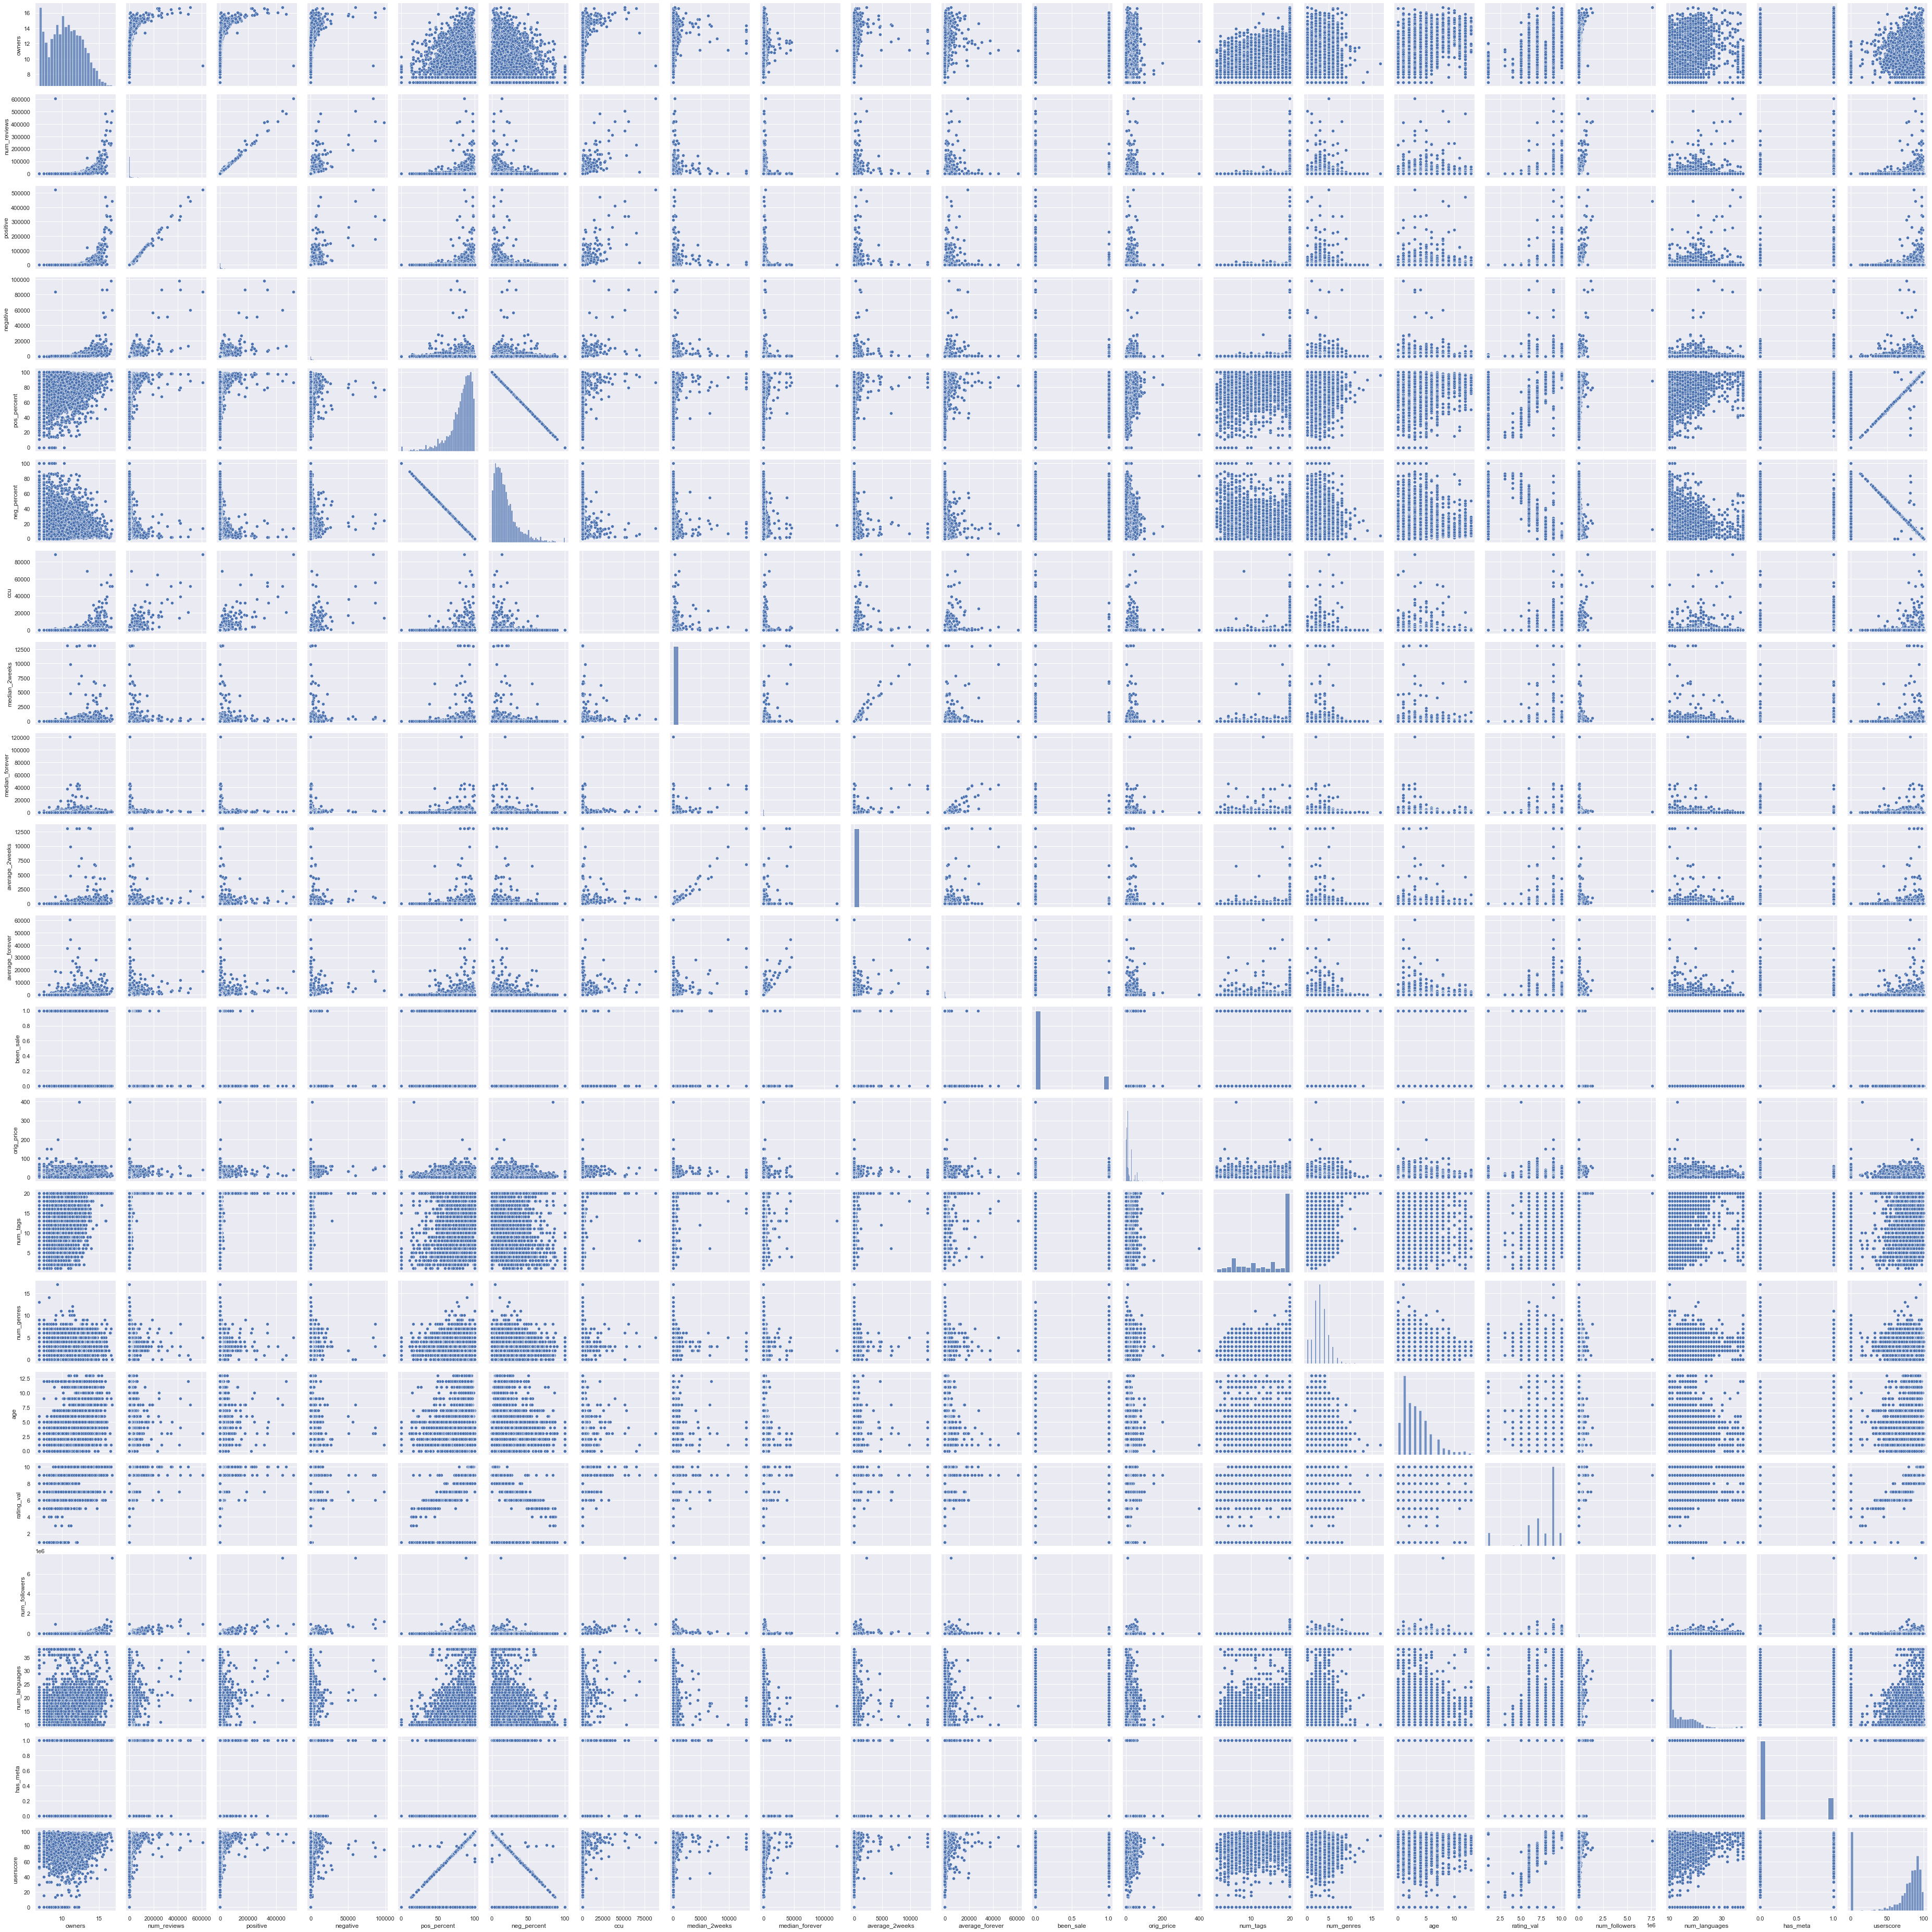

In [198]:
sns.pairplot(df.iloc[:,:22])

# Transforming Review Columns

Also into logs, from observing the pairplot.

In [269]:
log_list = ['num_reviews', 'positive', 'negative']

for things in log_list:
    df[things] = np.log(df[things])
    


In [270]:
df[df.positive == -inf]

title     owners  \
1915                CanopySim-Skydive Landing Simulator   6.907755   
2213                                       The Immortal   8.294050   
3003  Mystery Trackers: Winterpoint Tragedy Collecto...   6.907755   
3098                                     Cutthroat Cove   6.907755   
3503                       The Tales of Epicton Kingdom   6.907755   
3515                                  Flying Baron 1916   6.907755   
3638                                             Tevris   6.907755   
3722                                      Elder Village   6.907755   
3764                                      Wild Workshop   7.600902   
3991                                   Game Overlay Pro   6.907755   
4007                                           Tomscape   7.600902   
4017                                          driftwood   7.600902   
4345                                              Evoke   6.907755   
4374                        Classic Card Game Gin Rummy   8.699515   
4400                           Classic Card Game Hearts   8.517193   
4543                             Castle Of Pixel Skulls   6.907755   
4575             The Adventurer - Episode 2: New Dreams  10.275051   
4600                  Heavyweight Transport Simulator 3   9.104980   
4639                                 Epic Food Fight VR   6.907755   
4662                                           homicide   8.699515   
4782                                        In The Dark   8.294050   
4879                                          Blue Time   8.987197   

      num_reviews  positive  negative  pos_percent  neg_percent  ccu  \
1915     1.098612      -inf  1.098612          0.0        100.0    0   
2213     0.000000      -inf  0.000000          0.0        100.0    0   
3003     1.098612      -inf  1.098612          0.0        100.0    0   
3098     1.098612      -inf  1.098612          0.0        100.0    0   
3503     0.000000      -inf  0.000000          0.0        100.0    0   
3515     1.609438      -inf  1.609438          0.0        100.0    0   
3638     1.609438      -inf  1.609438          0.0        100.0    0   
3722     0.000000      -inf  0.000000          0.0        100.0    0   
3764     0.000000      -inf  0.000000          0.0        100.0    0   
3991     1.386294      -inf  1.386294          0.0        100.0    0   
4007     1.386294      -inf  1.386294          0.0        100.0    0   
4017     1.386294      -inf  1.386294          0.0        100.0    0   
4345     1.098612      -inf  1.098612          0.0        100.0    0   
4374     1.098612      -inf  1.098612          0.0        100.0    0   
4400     0.000000      -inf  0.000000          0.0        100.0    0   
4543     0.000000      -inf  0.000000          0.0        100.0    0   
4575     0.000000      -inf  0.000000          0.0        100.0    0   
4600     0.000000      -inf  0.000000          0.0        100.0    0   
4639     0.693147      -inf  0.693147          0.0        100.0    0   
4662     2.708050      -inf  2.708050          0.0        100.0    0   
4782     1.386294      -inf  1.386294          0.0        100.0    0   
4879     0.000000      -inf  0.000000          0.0        100.0    0   

      median_2weeks  median_forever  ...  Electronic Arts  \
1915              0               0  ...                0   
2213              0               0  ...                0   
3003              0               0  ...                0   
3098              0               0  ...                0   
3503              0               0  ...                0   
3515              0               0  ...                0   
3638              0               0  ...                0   
3722              0               0  ...                0   
3764              0               0  ...                0   
3991              0               0  ...                0   
4007              0               0  ...                0   
4017              0               0  ...          

In [271]:
for things in log_list:
    df.loc[df[things] == -inf,things] =0

In [276]:
df.negative.value_counts()

0.000000    311
0.693147    142
1.098612    127
1.609438     98
1.386294     95
           ... 
6.576470      1
6.532334      1
6.142037      1
8.645586      1
8.155936      1
Name: negative, Length: 1264, dtype: int64

In [277]:
X, y = df.iloc[:,2:], df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state=7)

In [278]:
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8637727237913265

In [279]:
lr.score(X_val, y_val)

0.8596278545588947

In [280]:
train_preds = lr.predict(X_train)
total_preds = lr.predict(X)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
total_rmse = mean_squared_error(y, total_preds, squared = False)

train_mae = mean_absolute_error(y_train, train_preds)
total_mae = mean_absolute_error(y, total_preds)

print(f'train rme is {train_rmse}')
print(f'total rme is {total_rmse}')

print(f'train mae is {train_mae}')
print(f'total mae is {total_mae}')

train rme is 0.8006244615843922
total rme is 0.8129098922307966
train mae is 0.5986784131020527
total mae is 0.6026224571887437


In [281]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [282]:
# num reviews and positive are very highly colinear, seen in all pair-plots, I can try manual feature selection,
# trying the model with one feature and then the other, or I can keep increasing complexity, and rely on LASSO
#to select which one

vif(X)

num_reviews     721.870683
positive        810.209858
negative         28.211147
pos_percent     245.282729
neg_percent      39.243379
                   ...    
THQ Nordic        2.490124
Ubisoft           1.805939
Winged Cloud      2.742845
other            20.652010
tinyBuild         2.878789
Length: 91, dtype: float64

In [219]:
df.head(2)

title     owners  num_reviews   positive  negative  pos_percent  \
0     OUTRIDERS  14.409390    10.642134  10.200699  9.611797    64.311309   
1  It Takes Two  13.561908     9.956175   9.913685  6.776507    95.840053   

   neg_percent    ccu  median_2weeks  median_forever  ...  \
0    35.688691  23037            279            1600  ...   
1     4.159947  11513            425             753  ...   

   Paradox Interactive  SEGA  Sokpop Collective  Square Enix  THQ Nordic  \
0                    0     0                  0            1           0   
1                    0     0                  0            0           0   

   Ubisoft  Winged Cloud  other  tinyBuild  False  
0        0             0      0          0      0  
1        0             0      0          0      0  

[2 rows x 94 columns]

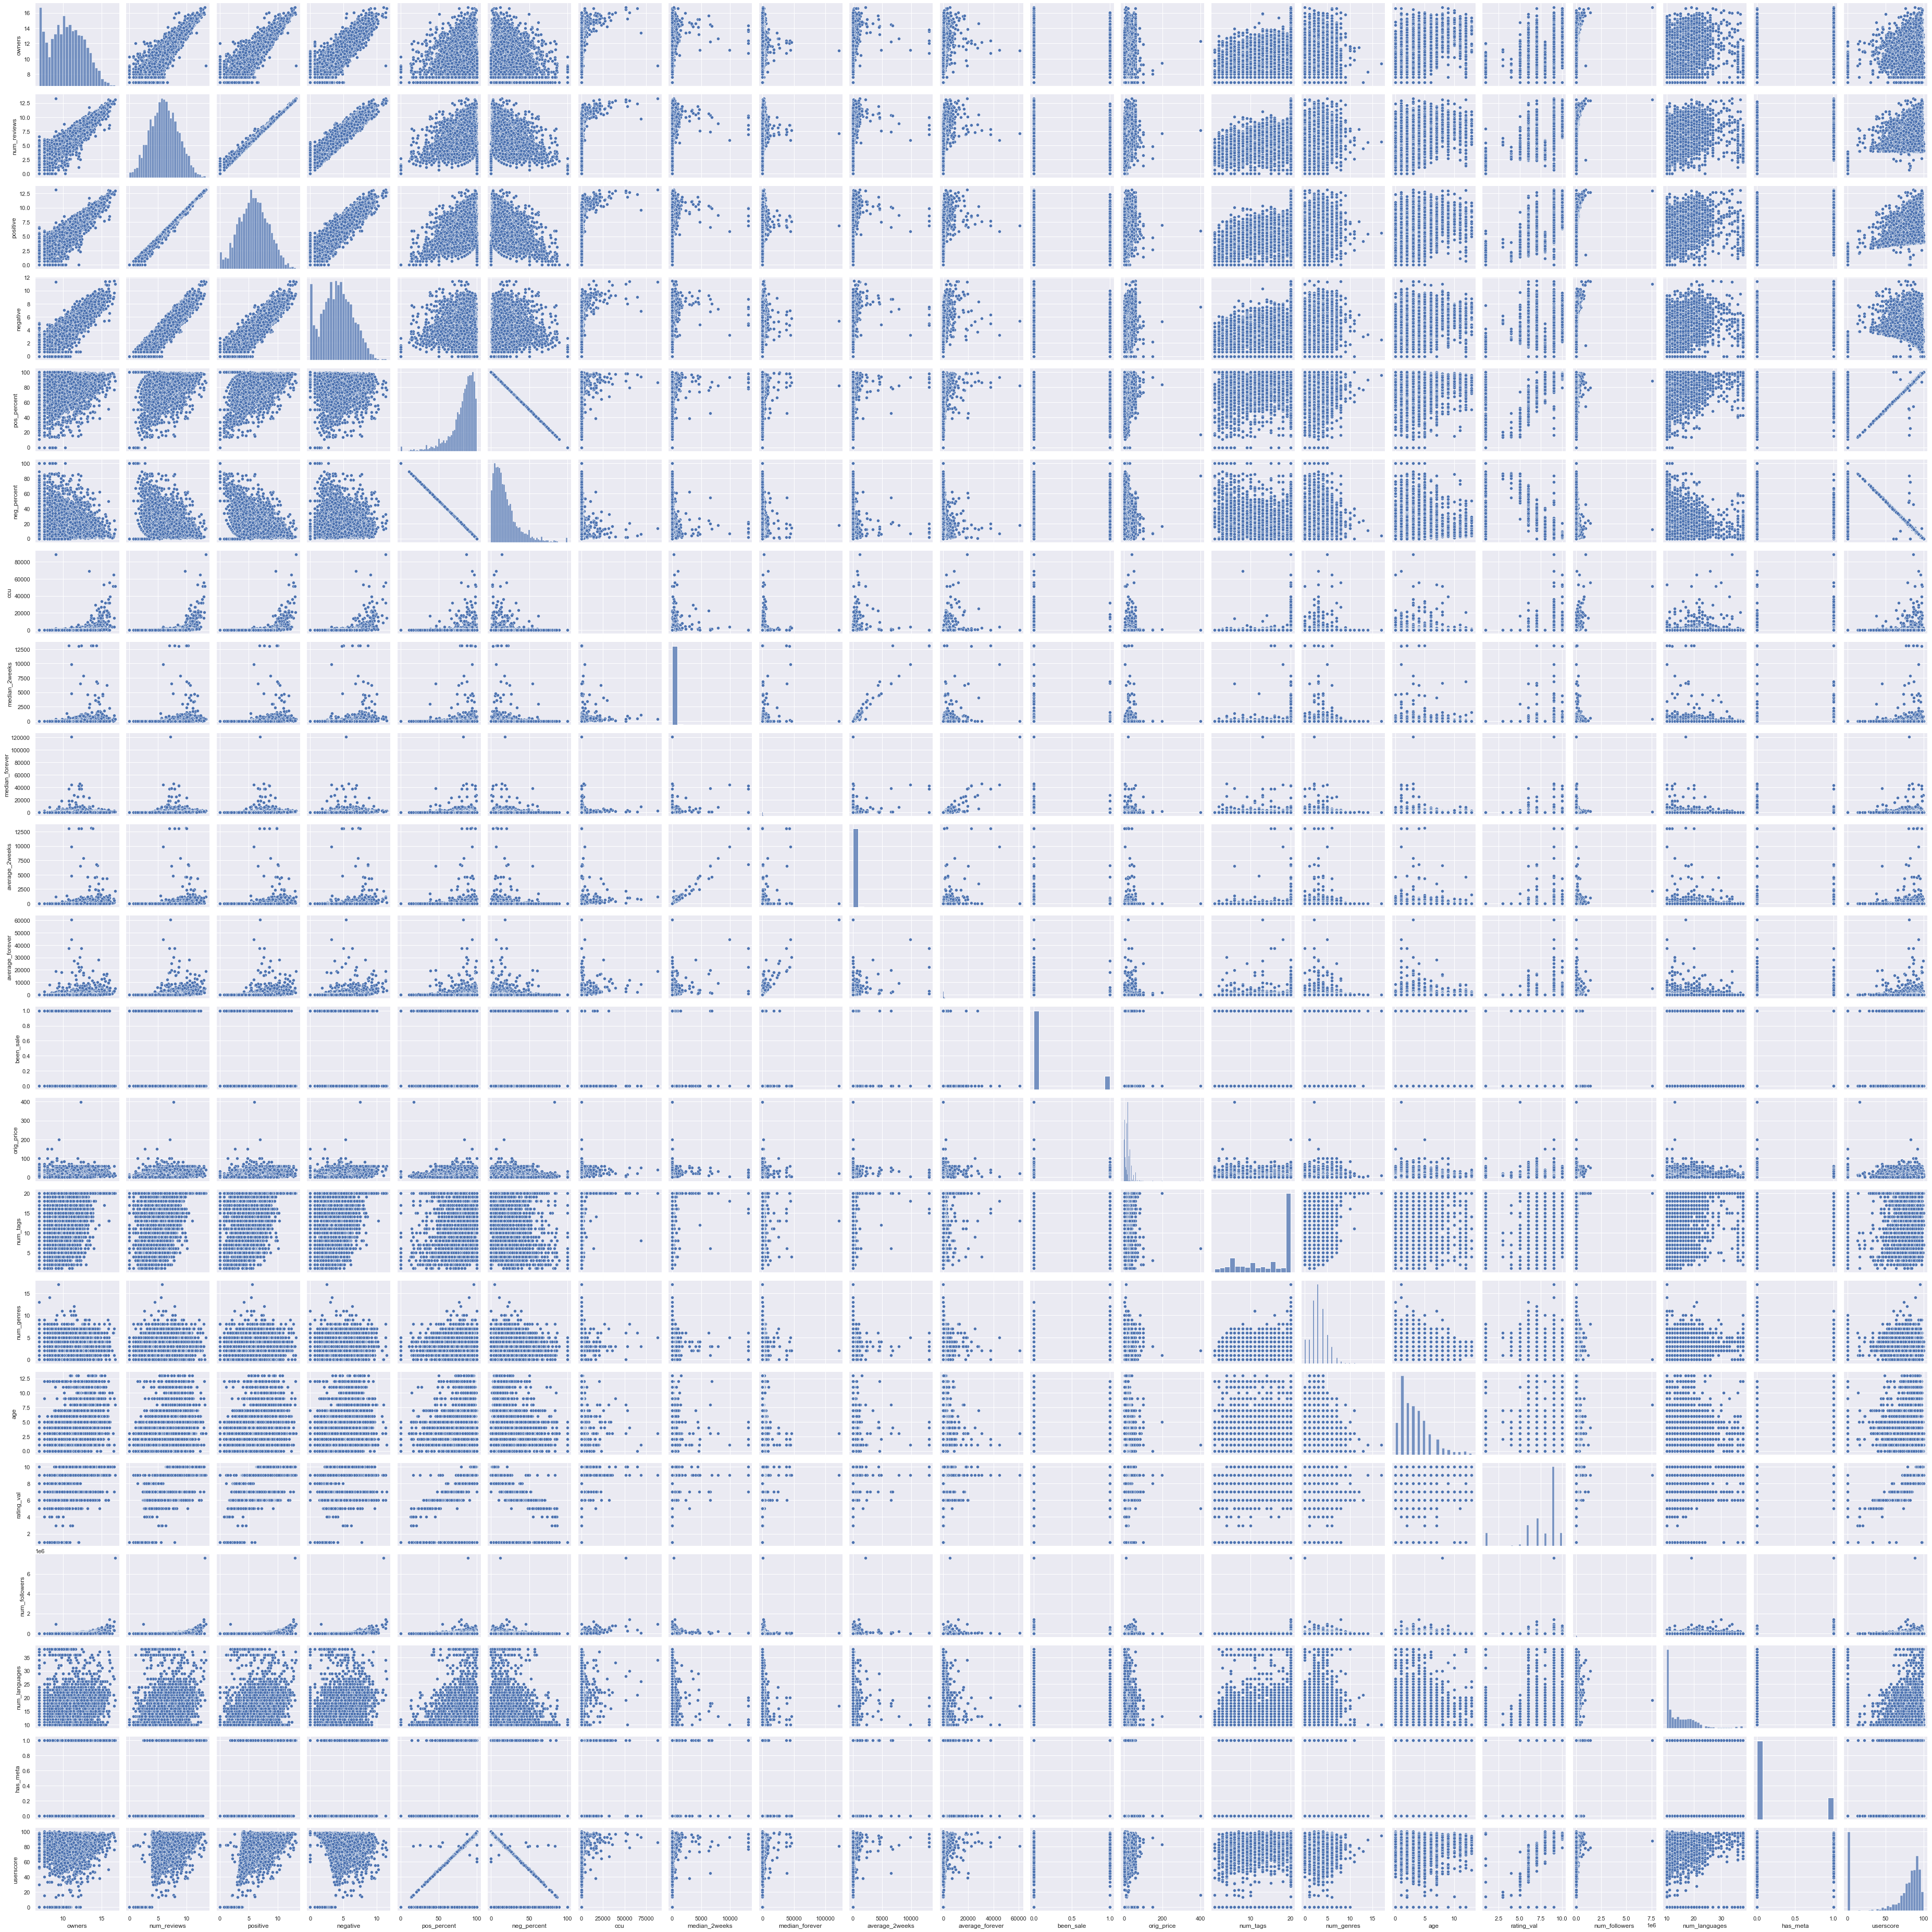

In [114]:
sns.pairplot(df.iloc[:,1:22])

# Checking skew before moving forward

In [283]:
skew_checklist = df.iloc[:,2:22].columns

In [284]:
skew_checklist_all = df.dtypes[df.dtypes != 'object'].index

In [285]:
skewed_feats = df[skew_checklist_all].skew().sort_values(ascending=False)

In [286]:
strong_skews = skewed_feats[skewed_feats>10].keys()

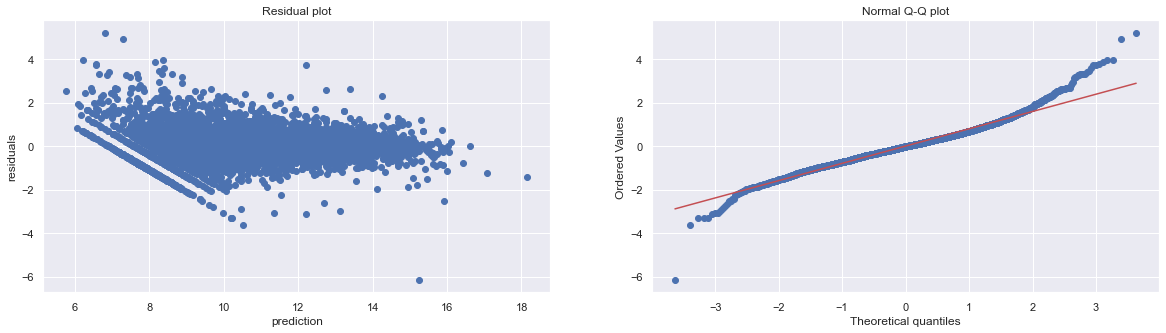

In [287]:
diagnostic_plot(X,y)

In [288]:
df.head()

title     owners  num_reviews   positive   negative  pos_percent  \
0      OUTRIDERS  14.409390    10.642134  10.200699   9.611797    64.311309   
1   It Takes Two  13.561908     9.956175   9.913685   6.776507    95.840053   
2        Valheim  16.556996    12.350247  12.312912   9.043813    96.335335   
3  7 Days to Die  15.893451    12.024347  11.881436  10.008208    86.683137   
4  Battlefield V  13.851842    10.293771   9.885425   9.200896    66.474888   

   neg_percent    ccu  median_2weeks  median_forever  ...  Electronic Arts  \
0    35.688691  23037            279            1600  ...                0   
1     4.159947  11513            425             753  ...                1   
2     3.664665  64931            435            1113  ...                0   
3    13.316863  31593            186             766  ...                0   
4    33.525112  13485            479             799  ...                1   

   Paradox Interactive  SEGA  Sokpop Collective  Square Enix  THQ Nordic  \
0                    0     0                  0            1           0   
1                    0     0                  0            0           0   
2                    0     0                  0            0           0   
3                    0     0                  0            0           0   
4                    0     0                  0            0           0   

   Ubisoft  Winged Cloud  other  tinyBuild  
0        0             0      0          0  
1        0             0      0          0  
2        0             0      1          0  
3        0             0      1          0  
4        0             0      0          0  

[5 rows x 93 columns]

In [289]:
df[skew_checklist_all].skew().sort_values(ascending=False)

num_followers     45.618600
Activision        40.583239
median_forever    25.055264
Disney            22.181081
average_2weeks    18.973376
                    ...    
num_tags          -0.641747
userscore         -1.198258
pos_percent       -1.752285
rating_val        -1.761988
other             -3.126680
Length: 92, dtype: float64

In [290]:
more_logs = list(df.columns)[7:11]

In [291]:
more_logs

['ccu', 'median_2weeks', 'median_forever', 'average_2weeks']

In [292]:
for things in more_logs:
    df[things] = np.log(df[things])
    df.loc[df[things] == -inf,things] =0
    


In [293]:
df.head(3)

title     owners  num_reviews   positive  negative  pos_percent  \
0     OUTRIDERS  14.409390    10.642134  10.200699  9.611797    64.311309   
1  It Takes Two  13.561908     9.956175   9.913685  6.776507    95.840053   
2       Valheim  16.556996    12.350247  12.312912  9.043813    96.335335   

   neg_percent        ccu  median_2weeks  median_forever  ...  \
0    35.688691  10.044857       5.631212        7.377759  ...   
1     4.159947   9.351232       6.052089        6.624065  ...   
2     3.664665  11.081080       6.075346        7.014814  ...   

   Electronic Arts  Paradox Interactive  SEGA  Sokpop Collective  Square Enix  \
0                0                    0     0                  0            1   
1                1                    0     0                  0            0   
2                0                    0     0                  0            0   

   THQ Nordic  Ubisoft  Winged Cloud  other  tinyBuild  
0           0        0             0      0          0  
1           0        0             0      0          0  
2           0        0             0      1          0  

[3 rows x 93 columns]

In [184]:
df.neg_percent.value_counts()

0.0    4947
Name: neg_percent, dtype: int64